<a href="https://colab.research.google.com/github/iyeboah22/GIS-DS/blob/main/ps1(Redo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import os, zipfile
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import fiona

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files

from google.colab import data_table
data_table.enable_dataframe_formatter()

In [2]:
#Read in Mental health disorder data
! wget -q -O Mental.csv  https://github.com/iyeboah22/GIS-DS/raw/main/Mental%20health%20Depression%20disorder%20Data.csv
geo_mh = pd.read_csv('Mental.csv')


<ipython-input-2-19a5e2c049af>:3: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  geo_mh = pd.read_csv('Mental.csv')


In [3]:

#Read in country coordinates
! wget -q -O countries2.csv  https://github.com/iyeboah22/GIS-DS/raw/main/countries%202.csv #aok: there is no such data file countries_2.csv in github! you need to upload it first
geo_coord=pd.read_csv('countries2.csv')

In [ ]:
#let's rename the columns to something shorter
map_names = {'Entity': 'country',
             'Code': 'code',
             'Year' : 'year',
             'Schizophrenia (%)':'schizo',
             'Bipolar disorder (%)':'bipolar',
             'Eating disorders (%)' : 'eating dis',
             'Anxiety disorders (%)' : 'anxiety',
             'Drug use disorders (%)':'drug',
             'Depression (%)':'depres',
             'Alcohol use disorders (%)':'alcohol'}

geo_mh.rename(columns=map_names,inplace=True)

geo_mh['schizo'] = pd.to_numeric(geo_mh['schizo'], errors='coerce')
geo_mh['bipolar'] = pd.to_numeric(geo_mh['bipolar'], errors='coerce')
geo_mh['eating dis'] = pd.to_numeric(geo_mh['eating dis'], errors='coerce')



geo_mh = geo_mh.drop(columns= ['index'])
print(geo_mh.info())

In [ ]:
#Dropping the rows which have non-numerical data, and so we concentrate on the rows up to 6467 for now
geo_mh = geo_mh.dropna()
geo_mh

In [ ]:
print(geo_coord.info())

In [ ]:
#Using lat and long to get geo points
geo_coord = gpd.GeoDataFrame(geo_coord, geometry=gpd.points_from_xy(geo_coord.latitude, geo_coord.longitude))
geo_coord.head()

In [ ]:
geo_mh.rename(columns = {'country':'name'}, inplace = True)
geo_mh.head()


In [9]:
geo_mh = geo_mh.merge(geo_coord, on='name')

geo_mh.head()

,name,code,year,schizo,bipolar,eating dis,anxiety,drug,depres,alcohol,country,latitude,longitude,geometry
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,AF,33.93911,67.709953,POINT (33.93911 67.70995)
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,AF,33.93911,67.709953,POINT (33.93911 67.70995)
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,AF,33.93911,67.709953,POINT (33.93911 67.70995)
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,AF,33.93911,67.709953,POINT (33.93911 67.70995)
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,AF,33.93911,67.709953,POINT (33.93911 67.70995)


In [10]:
geo_mh.rename(columns = {'country':'ISO'}, inplace = True)
geo_mh.head()

,name,code,year,schizo,bipolar,eating dis,anxiety,drug,depres,alcohol,ISO,latitude,longitude,geometry
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,AF,33.93911,67.709953,POINT (33.93911 67.70995)
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,AF,33.93911,67.709953,POINT (33.93911 67.70995)
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,AF,33.93911,67.709953,POINT (33.93911 67.70995)
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,AF,33.93911,67.709953,POINT (33.93911 67.70995)
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,AF,33.93911,67.709953,POINT (33.93911 67.70995)


In [11]:
geo_mh.rename(columns = {'name':'COUNTRY'}, inplace = True)
geo_mh.head()

,COUNTRY,code,year,schizo,bipolar,eating dis,anxiety,drug,depres,alcohol,ISO,latitude,longitude,geometry
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,AF,33.93911,67.709953,POINT (33.93911 67.70995)
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,AF,33.93911,67.709953,POINT (33.93911 67.70995)
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,AF,33.93911,67.709953,POINT (33.93911 67.70995)
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,AF,33.93911,67.709953,POINT (33.93911 67.70995)
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,AF,33.93911,67.709953,POINT (33.93911 67.70995)


In [ ]:
#Have a quick look at the data through the years for one country
#usa = geo_mh[geo_mh['code'] == 'USA']
#na = usa.dropna()
#na.head()

In [ ]:
# create list of countries for North America to extract these into a separate dataframe
#country_na = ['United States','Mexico',
                  'Greenland','Canada',
                  'Cuba','Jamaica',
                  'Panama','Haiti',
                  'Puerto Rico','Costa Rica',
                  'Dominican Republic','Guatemala',
                  'Honduras','Belize',
                  'The Bahamas...','Nicaragua',
                  'Martinique','Sint Maarten','Turks and Caicos Islands',
                  'Grenada','Saint Kitts and Nevis','Cayman Islands',
                  'United States Minor Outlying Islands','Antigua Barbuda','Anguilla',
                  'Dominica','Saint Lucia','Saint Vincet and the Grenadines',
                  'British Virgins Islands','Saint Pierre and Miquelon','United States Virgin Islands',
                  'Saint Barthelemy','Momtserrat','Saint Martin']

In [ ]:
#na = geo_mh[geo_mh['name'].isin(country_na)]

#print(usa)
#na.head(500)

In [12]:
! wget -q -O world.zip https://github.com/iyeboah22/GIS-DS/raw/main/World_Countries_Generalized.zip

zip_ref = zipfile.ZipFile('world.zip', 'r');
zip_ref.extractall();
zip_ref.close();

world_map = gpd.read_file('World_Countries_Generalized/World_Countries_Generalized.shp')

In [16]:
world_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         251 non-null    int64   
 1   COUNTRY     251 non-null    object  
 2   ISO         251 non-null    object  
 3   COUNTRYAFF  250 non-null    object  
 4   AFF_ISO     250 non-null    object  
 5   SHAPE_Leng  251 non-null    float64 
 6   SHAPE_Area  251 non-null    float64 
 7   geometry    251 non-null    geometry
dtypes: float64(2), geometry(1), int64(1), object(4)
memory usage: 15.8+ KB


In [30]:
world_map1 = pd.merge(world_map, geo_mh, on='COUNTRY')
result = world_map1[["COUNTRY", "drug"]]
print(result)
#world_map1.head()

          COUNTRY      drug
0     Afghanistan  1.677082
1     Afghanistan  1.684746
2     Afghanistan  1.694334
3     Afghanistan  1.705320
4     Afghanistan  1.716069
...           ...       ...
4979     Zimbabwe  0.766280
4980     Zimbabwe  0.768914
4981     Zimbabwe  0.771802
4982     Zimbabwe  0.772275
4983     Zimbabwe  0.772648

[4984 rows x 2 columns]


In [24]:
world_map1 = world_map1.dropna()


AttributeError: ignored

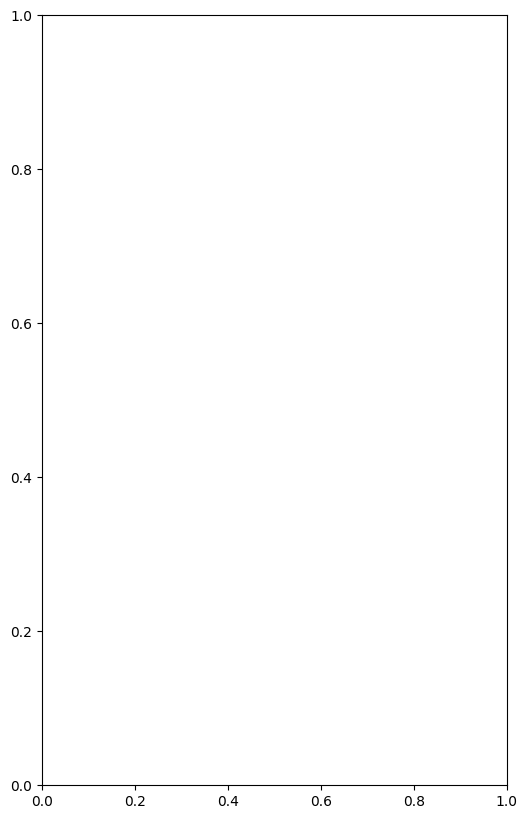

In [33]:
fig, ax = plt.subplots(1, figsize=(6,10))
world_map1.plot(ax=ax,column='drug',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as


In [ ]:

#having trouble merging
na_shp1 = pd.merge(na_shp, na, on='country',how='inner',indicator=True)
na_shp1.info()
#na_shp1.plot()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   AREA        28 non-null     float64 
 1   PERIMETER   28 non-null     float64 
 2   USACANAB_   28 non-null     int64   
 3   USACANAB_I  28 non-null     int64   
 4   country     28 non-null     object  
 5   geometry_x  28 non-null     geometry
 6   name        28 non-null     object  
 7   code        28 non-null     object  
 8   year        28 non-null     object  
 9   schizo      28 non-null     float64 
 10  bipolar     28 non-null     float64 
 11  eating dis  28 non-null     float64 
 12  anxiety     28 non-null     float64 
 13  drug        28 non-null     float64 
 14  depres      28 non-null     float64 
 15  alcohol     28 non-null     float64 
 16  latitude    28 non-null     float64 
 17  longitude   28 non-null     float64 
 18  geometry_y  28 non-null     geometry
 19  _m

In [ ]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

/Users/yeboahi/anaconda3/lib/python3.11/site-packages/google/colab/data_table.py:30: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



In [ ]:
# Alcohol Abuse
alc_data = dict(
        type = 'choropleth',
        colorscale = 'turbo',
        reversescale = True,
        locations = usa['name'],
        locationmode = "country names",
        z = usa['alcohol'],
        text = usa['country'],
        colorbar = {'title' : 'Alcohol Abuse %'},
      )
alc_layout = dict(title = 'Alcohol Abuse in North America in 2017',
              geo = dict({'scope':'north america'}, projection = {'type':'natural earth'}, showframe = True))

In [ ]:
go.Figure(data = [alc_data],layout = alc_layout)
choromap = go.Figure(data = [alc_data],layout = alc_layout)
iplot(choromap)

In [ ]:
# Depression
dep_data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        reversescale = True,
        locations = usa['name'],
        locationmode = "country names",
        z = usa['depres'],
        text = usa['country'],
        colorbar = {'title' : 'Depression %'},
      )
dep_layout = dict(title = 'Depressive Disorder in North America in 2017',
              geo = dict({'scope':'north america'}, projection = {'type':'natural earth'}, showframe = True))

In [ ]:
go.Figure(data = [dep_data],layout = dep_layout)
choromap = go.Figure(data = [dep_data],layout = dep_layout)
iplot(choromap)